# This notebook is using the Iris Dataset via unsupervised learning to see how the algorithm will learn

## At the end, the result should be trying to classify the iris types
### Given the iris dataset, if we knew that there were k types of iris, but did not have access to a taxonomist to label them: we could try a clustering task: split the observations into well-separated group called clusters.

Done by: Brian Tham<Br>
Check out my other projects on [briantham.com](https://briantham.com)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('iris_data.csv', header = None)#need to have iris_data.csv in folder
df.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm', 'species'] 
#introduce columns headers to the dataset

In [3]:
df.head()    # first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()   # last 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()   # all non-null and numeric [except the labels]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

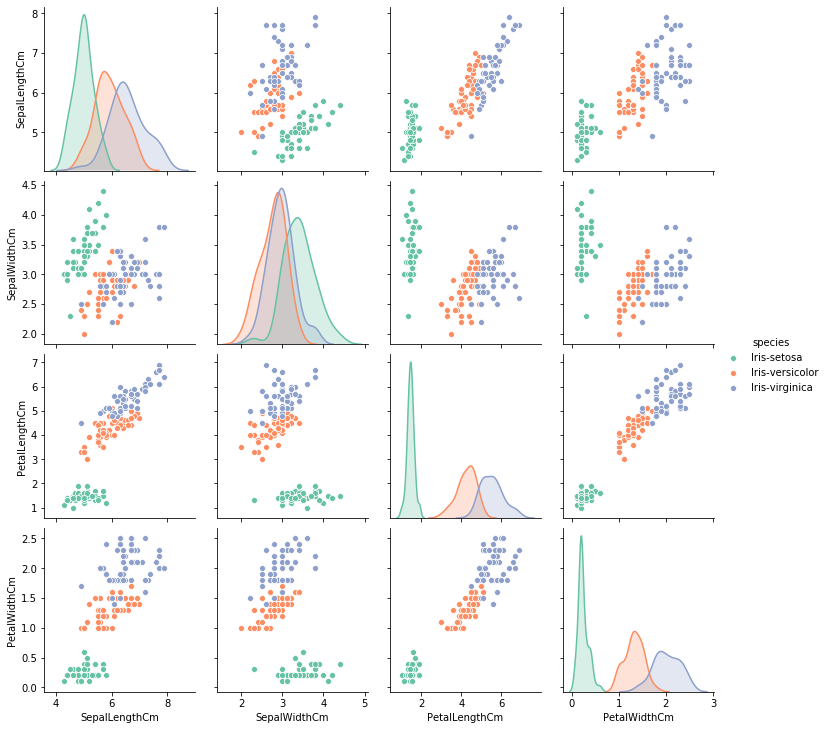

In [7]:
sns.pairplot(data=df,hue="species",palette="Set2")
plt.show()

### Graph above shows the spread of features of the flowers. 
### As you can see, some patterns are begining to emerge

#### And you also notice that there is one group of data that can easily be differentiated from the rest, and that is the sestosa

In [8]:
#Remove labels
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

## KMeans clustering

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99) 
#I used 99 clusters as a random number, you can use any number you like

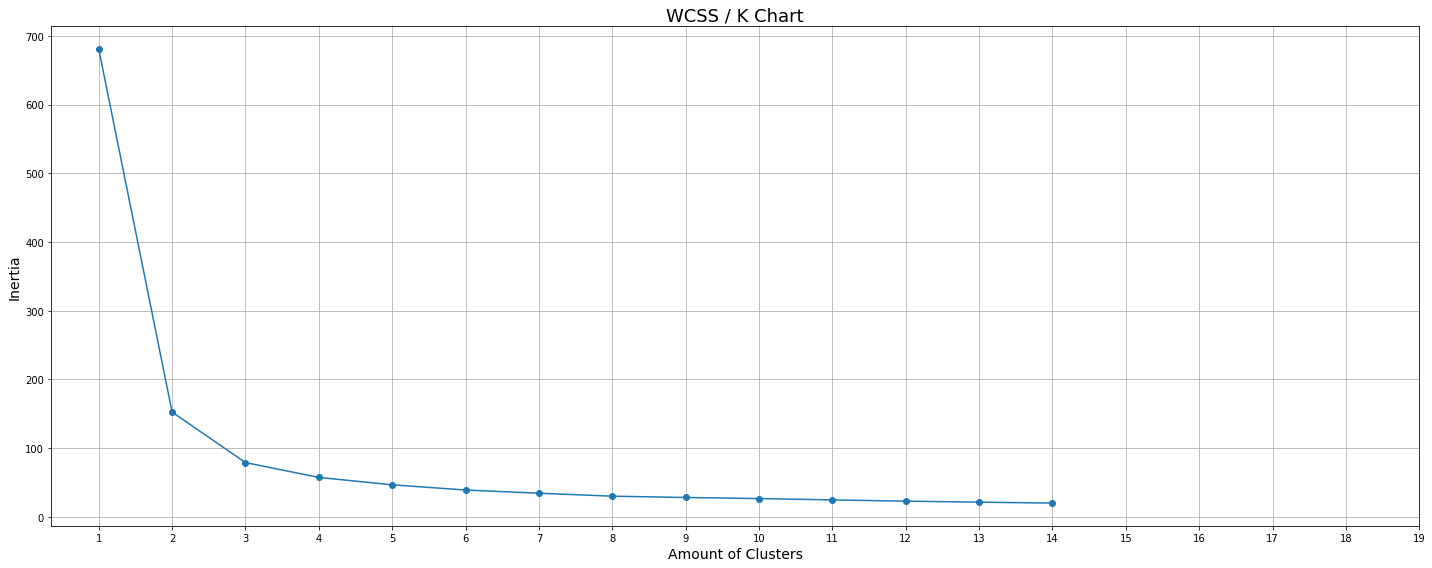

In [10]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()


### I will be using an elbow rule on the above graph to determine the best number of clusters, for the elbow rule, you are looking for a elbow like shape, which occurs around the number 2 and 3

#### **3 or 2** seems to be our best values

## Check if the cluster is best between 2 and 3

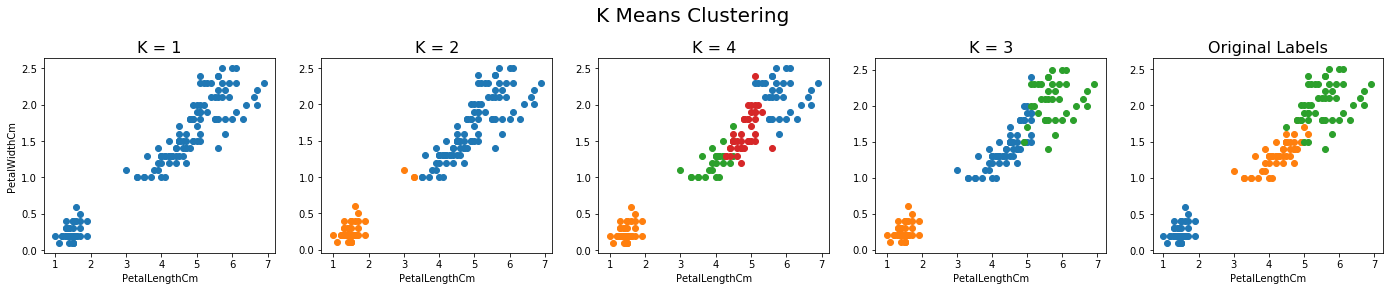

In [11]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# I drop labels since I only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# I drop labels since I only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# I drop labels since I only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.PetalLengthCm[df.species == "Iris-setosa"],df.PetalWidthCm[df.species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.species == "Iris-versicolor"],df.PetalWidthCm[df.species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.species == "Iris-virginica"],df.PetalWidthCm[df.species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

### Kmeans visibly did an amazing job with **3** clusters. Except few data points, I can say prediction is identical to the original with labels. Which shows that our elbow chart was right.


# Hierarchical  Clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc_cluster = AgglomerativeClustering(n_clusters=99)    

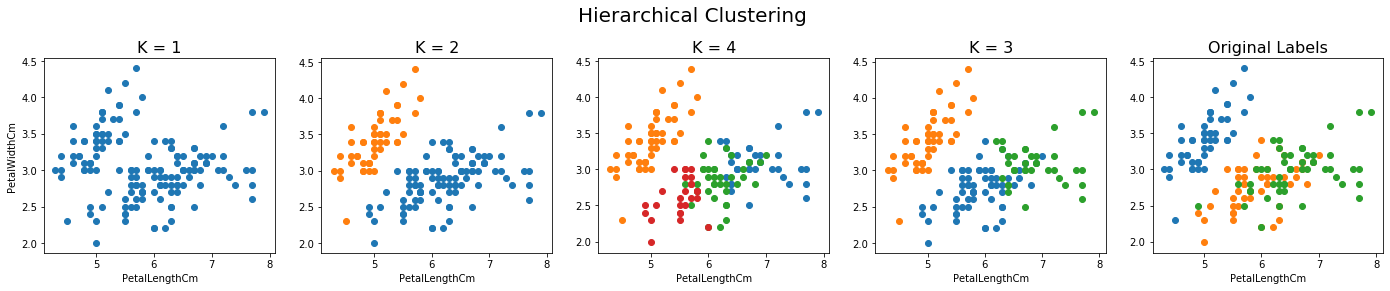

In [13]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.SepalLengthCm,features.SepalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=2)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=4)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])
plt.scatter(features.SepalLengthCm[features.labels == 3],features.SepalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=3)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])


plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.SepalLengthCm[df.species == "Iris-setosa"],df.SepalWidthCm[df.species == "Iris-setosa"])
plt.scatter(df.SepalLengthCm[df.species == "Iris-versicolor"],df.SepalWidthCm[df.species == "Iris-versicolor"])
plt.scatter(df.SepalLengthCm[df.species == "Iris-virginica"],df.SepalWidthCm[df.species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

### This graphs shows that 3 clusters is the best for our dataset

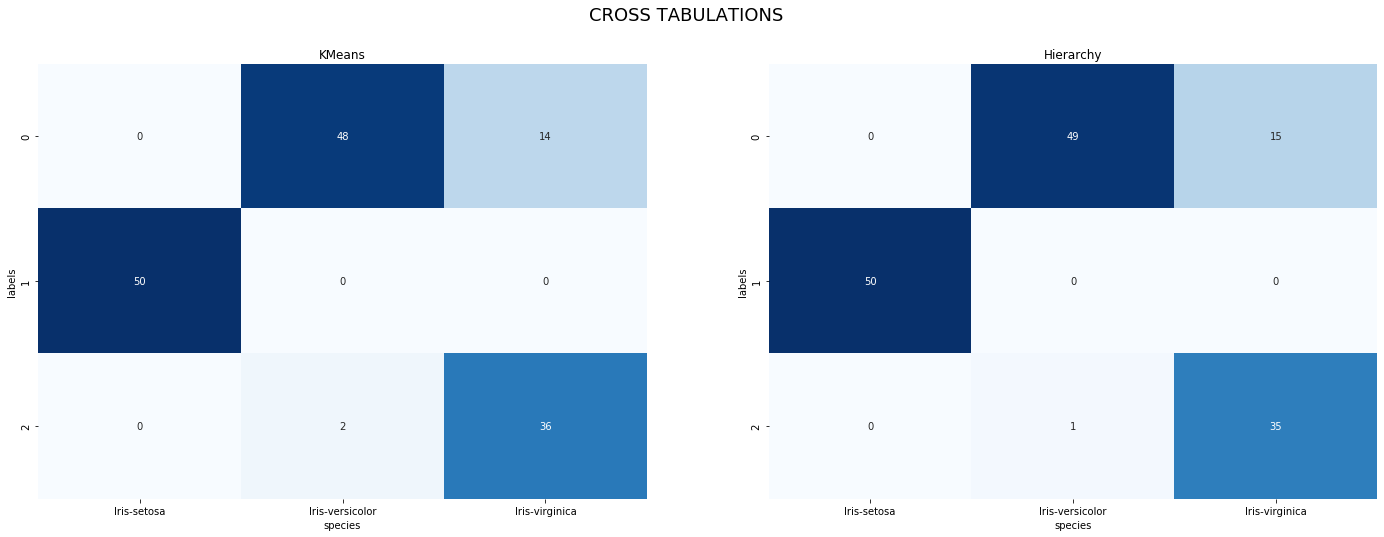

In [14]:
# I drop labels since I only want to use features.
features.drop(["labels"],axis=1,inplace=True)

# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"species":df['species']})
ct1 = pd.crosstab(df1['labels'],df1['species'])


# hierarchy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_predict = hc_cluster.fit_predict(features)

# cross tabulation table for Hierarchy
df2 = pd.DataFrame({'labels':hc_predict,"species":df['species']})
ct2 = pd.crosstab(df2['labels'],df2['species'])


plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")


plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()

## As you can see from the above heatmaps, for the KMeans algorithm, Iris Setosa is the easiest to categorize, as all 50 of them are grouped together, for Iris-Versicolor, 2 of them were mislabelled, and finally 14 of Iris-Virginica were mislabelled.

## Similar results with hierachial, 1 of Versicolor was mislabelled and 15 of Virginica were mislabelled

# This shows that the model is able to easily tell if a flower is a sestosa, however, it encouters some difficulty when it comes to virginica